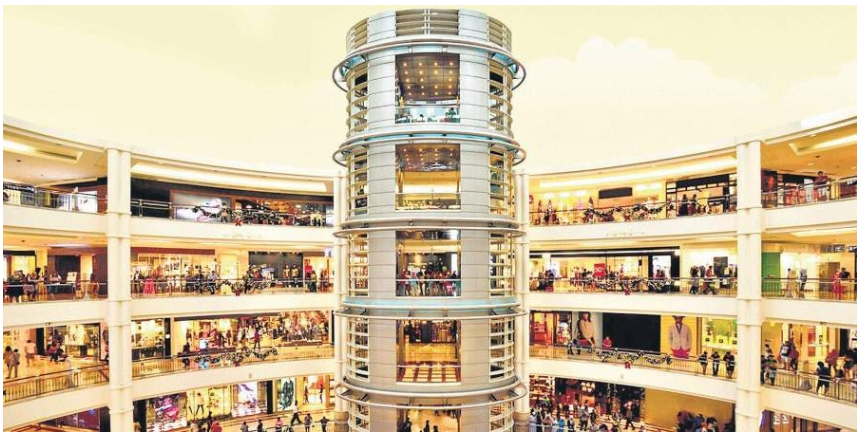

In [1]:
from IPython import display
display.Image("E:\Data\datasets\mall.PNG")

### Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

### Extract dataset

In [3]:
data = pd.read_csv("E:\Data\datasets\Mall_Customers.csv")

### EDA(Exploratory Data Analysis)

#### Data Understanding

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.shape

(200, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
print("column's name\n",data.columns)
print('total columns\n',len(data.columns))

column's name
 Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')
total columns
 5


In [8]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

### Data wrangling / munging

In [9]:
## find and remove null values

In [10]:
# find null values
data.isnull().sum()
# there is no single null value in data

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
# rename the columns
data.rename(columns={'Annual Income (k$)':'AnnualIncome','Spending Score (1-100)':'SpendingScore'}, inplace=True)

In [12]:
data.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
# drop CustomerID column
data=data.drop('CustomerID',axis=1)

In [14]:
data.head()

,Gender,Age,AnnualIncome,SpendingScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### Feature Engineering 

In [15]:
# apply encoding technique on gender column
encoder=LabelEncoder()
data['Gender']=encoder.fit_transform(data['Gender'])

In [16]:
data.head()

,Gender,Age,AnnualIncome,SpendingScore
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [17]:
# data scaling

In [18]:
scale=StandardScaler()
data=scale.fit_transform(data)

In [19]:
data

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

### Dimensionality Reduction
### PCA (Principle Component Analysis)

In [20]:
pca=PCA(n_components=2)

In [21]:
pca_data=pca.fit_transform(data)

In [22]:
df=pd.DataFrame(pca_data,columns=['pca_col1','pca_col2'])

###  data into train test split

In [23]:
trainx,testx=train_test_split(df,test_size=0.2)

In [24]:
print('train data shape',trainx.shape)
print('train data shape',testx.shape)

train data shape (160, 2)
train data shape (40, 2)


### Train Kmeans model

#### Elbow method 

In [25]:
#The elbow method is used to determine the optimal number of clusters in K-means clustering.
#The elbow method plots the value of the cost function produced by different values of K

C:\Users\Saddique\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


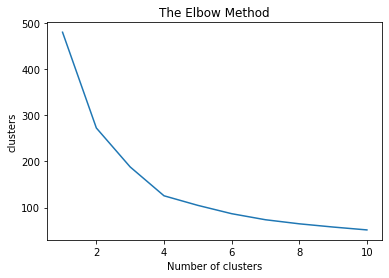

In [26]:

cluster = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df)
    cluster.append(kmeans.inertia_)
plt.plot(range(1, 11), cluster)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('clusters')
plt.show()

#### Apply model

In [27]:
km_model=KMeans(n_clusters=4)

In [28]:
km_model.fit(df)

KMeans(n_clusters=4)

In [29]:
km_model.inertia_

125.4937299933593

In [30]:
labels=km_model.labels_

In [31]:
y=km_model.predict(df)

In [32]:
df['labels']=y

In [33]:
df['labels']

0      0
1      0
2      2
3      0
4      2
      ..
195    3
196    1
197    3
198    1
199    3
Name: labels, Length: 200, dtype: int32

In [34]:
df

,pca_col1,pca_col2,labels
0,-0.406383,-0.520714,0
1,-1.427673,-0.367310,0
2,0.050761,-1.894068,2
3,-1.694513,-1.631908,0
4,-0.313108,-1.810483,2
...,...,...,...
195,-1.179572,1.324568,3
196,0.672751,1.221061,1
197,-0.723719,2.765010,3
198,0.767096,2.861930,1


C:\Users\Saddique\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


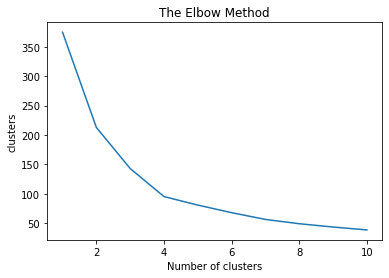

In [35]:
cluster = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(trainx)
    cluster.append(kmeans.inertia_)
plt.plot(range(1, 11), cluster)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('clusters')
plt.show()

In [36]:
km_model1=KMeans(n_clusters=4)

In [37]:
model_train=km_model1.fit(trainx)

In [38]:
y_predict=model_train.predict(testx)

### use of Hierarchical Clustering (aglomerative clustering)

In [39]:
## dendrogram
import scipy.cluster.hierarchy as sch

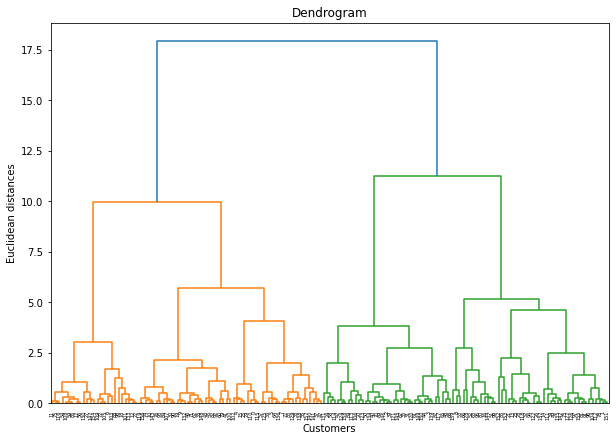

In [40]:
plt.figure(figsize=(10,7))
dendrogram= sch.dendrogram(sch.linkage(trainx,method="ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [41]:
from sklearn.cluster import AgglomerativeClustering
agc=AgglomerativeClustering(n_clusters=4)
agc.fit(trainx)

AgglomerativeClustering(n_clusters=4)

In [42]:
agc.fit_predict(testx)

array([0, 2, 1, 1, 1, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 1, 0, 1, 0, 0,
       2, 1, 0, 3, 0, 2, 2, 1, 1, 2, 0, 1, 2, 1, 0, 1, 1, 0], dtype=int64)

In [43]:
agc.labels_

array([0, 2, 1, 1, 1, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 1, 0, 1, 0, 0,
       2, 1, 0, 3, 0, 2, 2, 1, 1, 2, 0, 1, 2, 1, 0, 1, 1, 0], dtype=int64)

In [44]:
from sklearn.cluster import AgglomerativeClustering
agc=AgglomerativeClustering(n_clusters=4)
agc.fit(df)

AgglomerativeClustering(n_clusters=4)

In [45]:
y_pred=agc.fit_predict(df)

In [46]:
df['label1']=y_pred

In [47]:
df

,pca_col1,pca_col2,labels,label1
0,-0.406383,-0.520714,0,1
1,-1.427673,-0.367310,0,1
2,0.050761,-1.894068,2,0
3,-1.694513,-1.631908,0,1
4,-0.313108,-1.810483,2,0
...,...,...,...,...
195,-1.179572,1.324568,3,2
196,0.672751,1.221061,1,3
197,-0.723719,2.765010,3,2
198,0.767096,2.861930,1,3


In [48]:
# disply clustering graph

<AxesSubplot:xlabel='pca_col1', ylabel='pca_col2'>

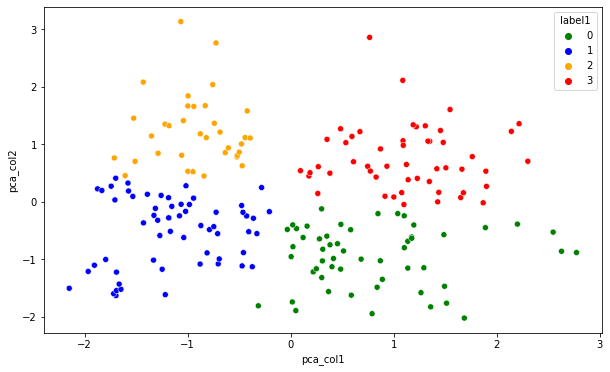

In [49]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='pca_col1',y='pca_col2',hue='label1',palette=['green','blue','orange','red'],data=df)

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report

In [51]:
print(ConfusionMatrixDisplay(df['label1'],display_labels=agc.labels_))

In [52]:
print(classification_report(df['label1'],agc.labels_))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        60
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        51

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

